The following dataset contains 1m rows of http response data from a web crawler, with the following schema:

hostnameHash - this is a hash of the hostname of the http request url.

pageGuid - this is a unique ID assigned to the http response received

parentPageGuid - the unique ID of the parent page of this request (more explanation on this below).

httpResponseCode - the http response code received

responseBodyMD5 - the md5 hash of the response body received

responseBodySize - the size, in bytes, of the response body

contentType - the contents of the content type header


In this web crawler, every http response is assigned a unique ID.  If a http response loads dependent requests (e.g., if we make a request to http://www.google.com, the response may include an additional request/response from https://www.google.com/images/nav_logo242.png) then those dependent requests will be assigned a parent page guid that matches the guid of the calling page.  If the parentPageGuid field is null, that means that the corresponding response came from a direct request (i.e., not loaded from some other page).  If the hostnameHash field is null, that means that we were unable to parse the url for some unknown reason.

Suppose you want to understand more about these hosts and their dependent requests.  What can you derive from this data?  Some ideas:

* what does the distribution of dependent requests across hosts look like?  What other basic statistics might be interesting to describe this data?
* can you classify hosts into reasonable "types" based on these features?  Conceivably, www.google.com will look different from www.nytimes.com, but perhaps www.google.com and www.bing.com are similar?

* are there interesting correlations between dependent requests?

* any other interesting question you might want to answer...

 

Please time-box your work to no more than 3 hours.  If you don't have time to generate results, please describe what you've done so far and the approach you would use if you were to invest more time into the problem.

 

Dataset link: https://drive.google.com/open?id=1l_fzmf1ncpm45EIwk4KZojPtT3uGscCj

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pdp


In [2]:
df = pd.read_csv('./data/rb_md5s.txt',delimiter='\t')

In [3]:
df.columns=('hostnameHash','parentPageGuid','pageGuid','httpResponseCode','responseBodyMD5','responseBodySize','contentType')

In [4]:
df.to_pickle('./pickle/df1.pkl')

In [5]:
df=pd.read_pickle('./pickle/df1.pkl')

In [8]:
df.head()

hostnameHash                        parentPageGuid  \
0  7905d1c4e12c54933a44d19fcd5f9356  1a6c0d62-b3b6-4bb2-aaed-f389f7771d60   
1  7905d1c4e12c54933a44d19fcd5f9356  1a6c0d62-b3b6-4bb2-aaed-f389f7771d60   
2  7905d1c4e12c54933a44d19fcd5f9356  1a6c0d62-b3b6-4bb2-aaed-f389f7771d60   
3  131a460e5e56b32eb51e09395cb62074  1a6c0d62-b3b6-4bb2-aaed-f389f7771d60   
4  131a460e5e56b32eb51e09395cb62074  1a6c0d62-b3b6-4bb2-aaed-f389f7771d60   

                               pageGuid  httpResponseCode  \
0  e998b51a-e117-4e28-8bc2-f3aa52b6cca9               301   
1  b80e939c-ec86-4ba0-a21b-a05f47d11f69               302   
2  14d39101-c2ac-46bc-bde9-fbb5822fc41c               200   
3  d9ad296b-5ea3-4964-bd15-e9e5fe52b873               200   
4  b188df1f-03e5-4b86-961e-0283120c1edd               200   

                    responseBodyMD5  responseBodySize             contentType  
0  d41d8cd98f00b204e9800998ecf8427e               NaN                     NaN  
1  07b4511278d33e0a152458bc56121059             128.0               text/html  
2  d681413ffee243c992957f487973ad36           13381.0         text/javascript  
3  687707a77e06dbaecaaa688f8485bad1          561539.0  application/javascript  
4  376728432654e63a857795e2d2738d47          188011.0                text/css

In [25]:
df = df.dropna(subset=['hostnameHash'])

In [27]:
df.head()

hostnameHash                        parentPageGuid  \
0  7905d1c4e12c54933a44d19fcd5f9356  1a6c0d62-b3b6-4bb2-aaed-f389f7771d60   
1  7905d1c4e12c54933a44d19fcd5f9356  1a6c0d62-b3b6-4bb2-aaed-f389f7771d60   
2  7905d1c4e12c54933a44d19fcd5f9356  1a6c0d62-b3b6-4bb2-aaed-f389f7771d60   
3  131a460e5e56b32eb51e09395cb62074  1a6c0d62-b3b6-4bb2-aaed-f389f7771d60   
4  131a460e5e56b32eb51e09395cb62074  1a6c0d62-b3b6-4bb2-aaed-f389f7771d60   

                               pageGuid  httpResponseCode  \
0  e998b51a-e117-4e28-8bc2-f3aa52b6cca9               301   
1  b80e939c-ec86-4ba0-a21b-a05f47d11f69               302   
2  14d39101-c2ac-46bc-bde9-fbb5822fc41c               200   
3  d9ad296b-5ea3-4964-bd15-e9e5fe52b873               200   
4  b188df1f-03e5-4b86-961e-0283120c1edd               200   

                    responseBodyMD5  responseBodySize  \
0  d41d8cd98f00b204e9800998ecf8427e               NaN   
1  07b4511278d33e0a152458bc56121059             128.0   
2  d681413ffee243c992957f487973ad36           13381.0   
3  687707a77e06dbaecaaa688f8485bad1          561539.0   
4  376728432654e63a857795e2d2738d47          188011.0   

   contentType_('image/jpeg', None)  contentType_Content-Type: image/gif  \
0                                 0                                    0   
1                                 0                                    0   
2                                 0                                    0   
3                                 0                                    0   
4                                 0                                    0   

   contentType_Content-type: image/png  contentType_Image/GIF  ...  \
0                                    0                      0  ...   
1                                    0                      0  ...   
2                                    0                      0  ...   
3                                    0                      0  ...   
4                                    0                      0  ...   

   contentType_text/xml  contentType_unknown  contentType_unknown/unknown  \
0                     0                    0                            0   
1                     0                    0                            0   
2                     0                    0                            0   
3                     0                    0                            0   
4                     0                    0                            0   

   contentType_video/MP2T  contentType_video/mp4  contentType_video/webm  \
0                       0                      0                       0   
1                       0                      0                       0   
2                       0                      0                       0   
3                       0                      0                       0   
4                       0                      0                       0   

   contentType_video/x-flv  contentType_x-font/eot  contentType_x-font/ttf  \
0                        0                       0                       0   
1                        0                       0                       0   
2                        0                       0                       0   
3                        0                       0                       0   
4                        0                       0                       0   

   contentType_x-font/woff  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  

[5 rows x 148 columns]

In [29]:
df.describe()

httpResponseCode  responseBodySize  contentType_('image/jpeg', None)  \
count     986330.000000      8.064840e+05                     986330.000000   
mean         220.688598      3.805297e+04                          0.000024   
std           60.398847      1.713338e+05                          0.004933   
min            0.000000      1.000000e+00                          0.000000   
25%          200.000000      5.610000e+02                          0.000000   
50%          200.000000      4.092000e+03                          0.000000   
75%          200.000000      2.438000e+04                          0.000000   
max          999.000000      1.048576e+07                          1.000000   

       contentType_Content-Type: image/gif  \
count                        986330.000000   
mean                              0.000063   
std                               0.007928   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                               1.000000   

       contentType_Content-type: image/png  contentType_Image/GIF  \
count                        986330.000000          986330.000000   
mean                              0.000002               0.000039   
std                               0.001424               0.006207   
min                               0.000000               0.000000   
25%                               0.000000               0.000000   
50%                               0.000000               0.000000   
75%                               0.000000               0.000000   
max                               1.000000               1.000000   

       contentType_Image/Jpeg  contentType_Image/gif  contentType_None  \
count           986330.000000          986330.000000     986330.000000   
mean                 0.000028               0.000001          0.000006   
std                  0.005328               0.001007          0.002466   
min                  0.000000               0.000000          0.000000   
25%                  0.000000               0.000000          0.000000   
50%                  0.000000               0.000000          0.000000   
75%                  0.000000               0.000000          0.000000   
max                  1.000000               1.000000          1.000000   

       contentType_application  ...  contentType_text/xml  \
count            986330.000000  ...         986330.000000   
mean                  0.000001  ...              0.000387   
std                   0.001007  ...              0.019676   
min                   0.000000  ...              0.000000   
25%                   0.000000  ...              0.000000   
50%                   0.000000  ...              0.000000   
75%                   0.000000  ...              0.000000   
max                   1.000000  ...              1.000000   

       contentType_unknown  contentType_unknown/unknown  \
count        986330.000000                986330.000000   
mean              0.000001                     0.000336   
std               0.001007                     0.018316   
min               0.000000                     0.000000   
25%               0.000000                     0.000000   
50%               0.000000                     0.000000   
75%               0.000000                     0.000000   
max               1.000000                     1.000000   

       contentType_video/MP2T  contentType_video/mp4  contentType_video/webm  \
count           986330.000000          986330.000000           986330.000000   
mean                 0.000001               0.000055                0.000020   
std                  0.001007               0.007399                0.004503   
min                  0.000000               0.000000                0.000000   
25%                  0.000000               0.000000                0.000000   
50%                  0.000000

In [14]:
df = pd.get_dummies(df,columns=['contentType'])

In [30]:
hash_df = df.groupby('hostnameHash').count()

In [18]:
hash_df.head()

parentPageGuid  pageGuid  httpResponseCode  \
hostnameHash                                                                   
000704a3e488015d32cc64a86dc32310               0         1                 1   
000758a353fa674f968ab5d837170129              13        15                15   
0007f9134e2994a9622699faa03fb446               4         4                 4   
000e7c78f3f74a9a932d54887cc6bb4f               2         2                 2   
00152d5fbe4125b51f6f9f46b862ecd3               2         3                 3   

                                  responseBodyMD5  responseBodySize  \
hostnameHash                                                          
000704a3e488015d32cc64a86dc32310                1                 0   
000758a353fa674f968ab5d837170129               15                13   
0007f9134e2994a9622699faa03fb446                4                 4   
000e7c78f3f74a9a932d54887cc6bb4f                2                 2   
00152d5fbe4125b51f6f9f46b862ecd3                3                 3   

                                  contentType_('image/jpeg', None)  \
hostnameHash                                                         
000704a3e488015d32cc64a86dc32310                                 1   
000758a353fa674f968ab5d837170129                                15   
0007f9134e2994a9622699faa03fb446                                 4   
000e7c78f3f74a9a932d54887cc6bb4f                                 2   
00152d5fbe4125b51f6f9f46b862ecd3                                 3   

                                  contentType_Content-Type: image/gif  \
hostnameHash                                                            
000704a3e488015d32cc64a86dc32310                                    1   
000758a353fa674f968ab5d837170129                                   15   
0007f9134e2994a9622699faa03fb446                                    4   
000e7c78f3f74a9a932d54887cc6bb4f                                    2   
00152d5fbe4125b51f6f9f46b862ecd3                                    3   

                                  contentType_Content-type: image/png  \
hostnameHash                                                            
000704a3e488015d32cc64a86dc32310                                    1   
000758a353fa674f968ab5d837170129                                   15   
0007f9134e2994a9622699faa03fb446                                    4   
000e7c78f3f74a9a932d54887cc6bb4f                                    2   
00152d5fbe4125b51f6f9f46b862ecd3                                    3   

                                  contentType_Image/GIF  \
hostnameHash                                              
000704a3e488015d32cc64a86dc32310                      1   
000758a353fa674f968ab5d837170129                     15   
0007f9134e2994a9622699faa03fb446                      4   
000e7c78f3f74a9a932d54887cc6bb4f                      2   
00152d5fbe4125b51f6f9f46b862ecd3                      3   

                                  contentType_Image/Jpeg  ...  \
hostnameHash                                              ...   
000704a3e488015d32cc64a86dc32310                       1  ...   
000758a353fa674f968ab5d837170129                      15  ...   
0007f9134e2994a9622699faa03fb446                       4  ...   
000e7c78f3f74a9a932d54887cc6bb4f                       2  ...   
00152d5fbe4125b51f6f9f46b862ecd3                       3  ...   

                                  contentType_text/xml  contentType_unknown  \
hostnameHash                                                                  
000704a3e488015d32cc64a86dc32310                     1                    1   
000758a353fa674f968ab5d837170129                    15                   15   
0007f9134e2994a9622699faa03fb446                     4                    4   
000e7c78f3f74a9a932d54887cc6bb4f                     2                    2   
00152d5fbe4125b51f6f9f46b862ecd3                     3                    3   

                                  co

In [34]:
pdp.ProfileReport(hash_df)

In [62]:
hash_df.index()

TypeError: 'Index' object is not callable

In [116]:
pdp.ProfileReport(hash_df.parentPageGuid)

In [117]:
hash_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15572 entries, 000704a3e488015d32cc64a86dc32310 to fffb87ab76cf6ed77d865b7844227c27
Columns: 147 entries, parentPageGuid to contentType_x-font/woff
dtypes: int64(147)
memory usage: 18.2+ MB


In [50]:
hash_df.parentPageGuid.describe()

count    15572.000000
mean        62.132096
std        591.906701
min          0.000000
25%          1.000000
50%          3.000000
75%         16.000000
max      46514.000000
Name: parentPageGuid, dtype: float64

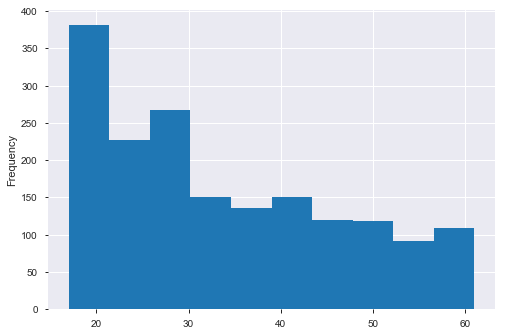

In [115]:
hash_df[(hash_df['parentPageGuid']>16) & (hash_df['parentPageGuid']<62)].parentPageGuid.plot.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a59074a90>]],
      dtype=object)

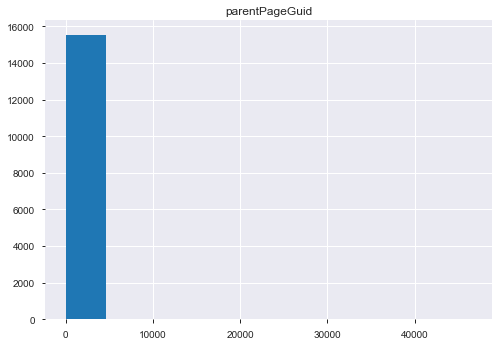

In [100]:
requests.sort_values(by="parentPageGuid",ascending=False).hist(bins=10,)

In [86]:
requests = hash_df[['parentPageGuid']]

In [14]:
df[['hostnameHash','parentPageGuid']].groupby(['hostnameHash','parentPageGuid']).count()

Empty DataFrame
Columns: []
Index: [(000704a3e488015d32cc64a86dc32310, 2a24aa6f-f281-498c-b34e-78a174e441ef), (000758a353fa674f968ab5d837170129, 03ef9533-5019-46fc-b158-352cac804b67), (000758a353fa674f968ab5d837170129, 03f2d54d-7a96-4178-a0e3-8f54908d8a94), (000758a353fa674f968ab5d837170129, 175c1232-e080-4be6-9544-cec697bd28ed), (000758a353fa674f968ab5d837170129, 18754e3c-0ff7-42a6-bffc-f39fd4991dab), (000758a353fa674f968ab5d837170129, 31678c13-62d0-404b-8c07-18fba375dcbb), (000758a353fa674f968ab5d837170129, 3b9cf7f6-f6b0-4972-a67c-706c74986bfd), (000758a353fa674f968ab5d837170129, 44ae513d-16da-416f-89b1-94709270fadb), (000758a353fa674f968ab5d837170129, 686ee1d3-0eef-4358-b71e-cc9e300aaf09), (000758a353fa674f968ab5d837170129, 92c91896-61b7-4aab-9bb5-5869a39cb93c), (000758a353fa674f968ab5d837170129, 974f888d-cb43-47dc-b94f-658c1246b5c0), (000758a353fa674f968ab5d837170129, ce57696a-2fcd-4761-8594-f9f989b2d2d9), (000758a353fa674f968ab5d837170129, e6888321-f81c-4fe4-a92a-73bc2209adbe), (000758a353fa674f968ab5d837170129, f8a977df-33e6-42b8-aa23-3d53728b24ed), (000758a353fa674f968ab5d837170129, fc7cfb12-f729-4e22-8774-0c03c8ddd374), (000758a353fa674f968ab5d837170129, feb9ab90-88d0-450c-9629-dfe3d1a725ef), (0007f9134e2994a9622699faa03fb446, 1283b292-e493-45f2-8883-3d6914014b27), (0007f9134e2994a9622699faa03fb446, 157b34fa-aab6-4939-ac33-10d4cab91f86), (0007f9134e2994a9622699faa03fb446, b3ea426c-9c77-4b6f-a896-78905f0cbac4), (0007f9134e2994a9622699faa03fb446, fa00e59a-e0b1-4f1a-8539-652564381be3), (000e7c78f3f74a9a932d54887cc6bb4f, 99562b76-5280-4a03-93b2-dce984b31aa3), (000e7c78f3f74a9a932d54887cc6bb4f, aacef6a2-6f7e-4ec6-ae04-4392bb708e76), (00152d5fbe4125b51f6f9f46b862ecd3, 2a09d81c-42f0-4972-84a4-cacb0be2a9f7), (00152d5fbe4125b51f6f9f46b862ecd3, 30d278f5-d256-45ec-9542-4061297a25b5), (00152d5fbe4125b51f6f9f46b862ecd3, 49661479-9761-42ce-a1e9-22c28f9a2af1), (0018c5469e810975769bd2470233868f, 2e71674c-17fd-4152-a7a1-4fefe9fb3faa), (0018c5469e810975769bd2470233868f, bc90d247-d12b-4f9d-8628-6ba119905426), (001d74bb3f28aaed078c549b35420d03, 34dedce4-7eee-4559-b69d-6f92ef853689), (001d74bb3f28aaed078c549b35420d03, 75cf2220-b867-4dc2-9291-4ac969719600), (001d74bb3f28aaed078c549b35420d03, 8248240d-120f-4ff5-aeaf-13e797a0f7cc), (001d74bb3f28aaed078c549b35420d03, a281c882-9516-4538-aac1-4b2eda2d6162), (001d74bb3f28aaed078c549b35420d03, e2c888a8-5571-4168-b7bd-5d4c8161141d), (001d74bb3f28aaed078c549b35420d03, e95f6aea-190a-464f-875b-0b681e9014e8), (001dcc1adf7693e8639d1d8132b77a90, 42295d01-8b9a-4656-ba9c-caaff8a4190f), (001dcc1adf7693e8639d1d8132b77a90, 8a984937-a6f4-4a67-bc8a-6fc35423caa6), (0021e2d1a666100a9ca1d9d99b98a068, 00003fbf-bfa9-4b8a-b8e0-028cbf0a3077), (0021e2d1a666100a9ca1d9d99b98a068, 012e3181-dc86-4bfe-889b-4a632e245d29), (0021e2d1a666100a9ca1d9d99b98a068, 01612b67-0786-487c-8377-bb4d957ff3f2), (0021e2d1a666100a9ca1d9d99b98a068, 04c02b95-6f13-4581-822f-12d1d8acd30c), (0021e2d1a666100a9ca1d9d99b98a068, 0fd1f8e1-8c13-42ef-a7d4-358fe82ac5eb), (0021e2d1a666100a9ca1d9d99b98a068, 0fdaedbb-4225-4e76-ac08-7d11d68e8258), (0021e2d1a666100a9ca1d9d99b98a068, 157f3c17-9347-4611-b2cb-f873bfbd664f), (0021e2d1a666100a9ca1d9d99b98a068, 17742137-0299-4a85-bb1b-ed1f55a1e81a), (0021e2d1a666100a9ca1d9d99b98a068, 179e49fd-9104-4012-8524-12689dde59b2), (0021e2d1a666100a9ca1d9d99b98a068, 236a2d81-1770-4927-a21c-2050023e618b), (0021e2d1a666100a9ca1d9d99b98a068, 23dcc09a-d3c5-4502-8981-d53f308b9276), (0021e2d1a666100a9ca1d9d99b98a068, 26a8c130-1179-4923-b7cd-33d8b6eb517d), (0021e2d1a666100a9ca1d9d99b98a068, 29acccf2-3a56-4bb3-8e2a-81766b3c5c56), (0021e2d1a666100a9ca1d9d99b98a068, 2bfb0262-b6bc-447f-aa55-242146b53847), (0021e2d1a666100a9ca1d9d99b98a068, 2d730557-8dc9-4811-9511-e30889446105), (0021e2d1a666100a9ca1d9d99b98a068, 2e5d9beb-32a4-4cb2-a3ad-2016dac367b6), (0021e2d1a666100a9ca1d9d99b98a068, 36975fa4-ca53-4311-acd6-915a73099bba), (0021e2d1a666100a9ca1d9d99b98a068, 3743073f-0818-4f22-9c1c-bb452e3100b1), (0021e2d1a666100a9ca1d9d99b98a068, 3774bd9

In [12]:
df.hostnameHash.value_counts()

cd1a781f134611f5e4cc24f76562bb7d    46514
131a460e5e56b32eb51e09395cb62074    36243
6ecf85dc29265a5041fc6ba07dd5b2ab    15798
c948dd7a61887edf9074a9f8c6461e34    12893
5804529ee4cfd3f4b630fa1e79e8637c    11271
014d64ec8e2e48a9ea5aa54062bc62c9    10541
0a137b375cc3881a70e186ce2172c8d1     9986
c333f8dafc080266b345002a8a5a5fb5     9576
576b67be8c1de540d053ad568a27af45     9469
59746a0206e4d6dbffaa21c420e4427f     8848
c4240f370111de1ec5203760b2159a3e     8450
3ebc7eff723a1d6549ea96e9d3779b0b     7931
d2153a21c926417514a224f8abca00f1     7347
e845cbdc3785b1a67978cbc5a146a168     7058
6b1f4aeeb2f1c8a68c0e46aec93d550e     6458
d5c5c85e129eb37139f8528b5c71ec3f     5700
f1b57ef2cf3ce2c546da65051aa66a7e     5549
50fbb858c32b045b323f64625c7499a3     5386
3ac992bd8a8bfcdd4b09a10c26e6b220     5320
ee94a17becbadc4e46be55df406de9cf     4988
f8d732cf85e612ab1c5ba0f2c09f0c9f     4929
0a3458ec82a581a4d4f0a68ba1d826c6     4925
caa49edfaf4759aa51e5c0d70e2ca8a8     4609
d1becdd25e5d5290f6d007a07090adea  

In [4]:
hostnamecounts = df.hostnameHash.value_counts()

In [5]:
sum(hostnamecounts.values==1)

4611

In [ ]:
hostnamecounts=hostnamecounts[hostnamecounts > 1000]

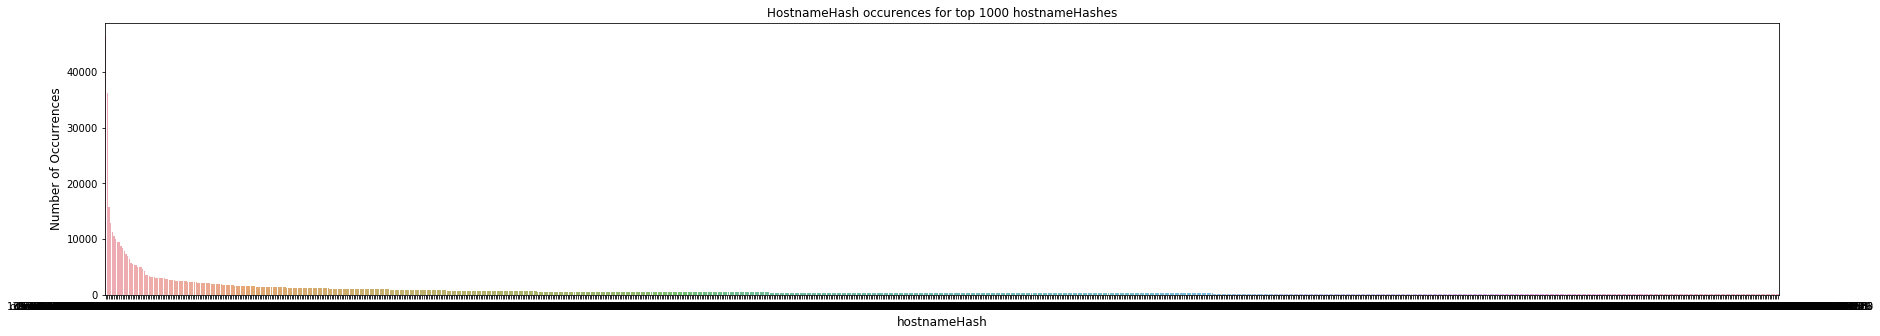

In [11]:
hash_count  = hostnamecounts
hash_count = city_count[:1000,]
plt.figure(figsize=(30,5))
sns.barplot(hash_count.index, hash_count.values, alpha=0.8)
plt.title('HostnameHash occurences for top 1000 hostnameHashes')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('hostnameHash', fontsize=12)
plt.show()

In [8]:
len(df.hostnameHash.value_counts())

15572

In [9]:
df[df['parentPageGuid']=='e998b51a-e117-4e28-8bc2-f3aa52b6cca9']

hostnameHash                              pageGuid  \
0  7905d1c4e12c54933a44d19fcd5f9356  1a6c0d62-b3b6-4bb2-aaed-f389f7771d60   

                         parentPageGuid  httpResponseCode  \
0  e998b51a-e117-4e28-8bc2-f3aa52b6cca9               301   

                    responseBodyMD5  responseBodySize contentType  
0  d41d8cd98f00b204e9800998ecf8427e               NaN         NaN

In [10]:
df[['hostnameHash','pageGuid','parentPageGuid']].groupby(['hostnameHash']).agg('count')

pageGuid  parentPageGuid
hostnameHash                                              
000704a3e488015d32cc64a86dc32310         0               1
000758a353fa674f968ab5d837170129        13              15
0007f9134e2994a9622699faa03fb446         4               4
000e7c78f3f74a9a932d54887cc6bb4f         2               2
00152d5fbe4125b51f6f9f46b862ecd3         2               3
0018c5469e810975769bd2470233868f         2               2
001d74bb3f28aaed078c549b35420d03         6               6
001dcc1adf7693e8639d1d8132b77a90         2               2
0021e2d1a666100a9ca1d9d99b98a068        79              80
00225f406d0bae4249986e68525ff957         8               8
002953c0a6c6ad060d7204e365fad0ad        32              32
0035a43324ed324fdce1425d431bdee8         7               7
00381d77b0fb6f083c2a574ef8b29f71         3               3
003eb7d4255dad4f0c5d7f3f01f2b2ab       179             180
003f48654756510d219cd01d2f44358f         1               1
0044a3562ec2dee60585b79b66e48304         1               1
0044b64e9500d5eece8916d50c50ab9d         7               7
0045274b5e1986c50ea9d3d5d6d06f06        34              34
0049c7f5ab31449e494af547955e78e0        44              46
0050f069f29143833f852c597c4ad877        10              10
0052f84b3d3109e31f7ed2cfabb0ad00       223             223
005371b8ff8cb3af3208c4e8213d2287        53              54
005b54dc95d39e9285ede8d1a820a510         0               2
005b7855bc7c955737a3626a42e1557d        69              69
005c40dcb7b1d1fb5a8bd3ddc081f394         3               3
005e4d66d9a71e9a1c16c81d5e0424c4        20              21
00614f6cbfd1fd1d140720e92d8d69a4         3               4
0063a2bcf013fb32a5fb1df15d613afa         5               5
00653d9e0210531ccbb7928462b0e24a         1               1
0068c983178f7a75ff75c2607f7fc3d0       120             121
...                                    ...             ...
ff9a88d2c7c23622584af559ccc7e0d9         1               1
ff9d2fb227b86b7381f5d72e226c2023         3               3
ffa15e6fc0b36d504927253027f0d5d9         1               1
ffa1e33a9abb970fb96941de8901b0ed        33              33
ffa628d75a8672cf7ff2438a8d5117a7        19              19
ffaaee5177ec94117ce32a01fe680da6         2               3
ffabe6ac6ac9c256e599676060eefb99        24              24
ffad3eb423343c63ee0260ebb9718952         0               1
ffaee4ed45f0f50f09835e065e05e008       603             623
ffaf4ba3a214b6bd11087c9c4288cfbe         4               4
ffb49af79fbc603eb6f84a50d0bd6269         1               1
ffb93ec7e76e4ead1175d8bb419fd511       389             394
ffb9fab5d5e1b3628311017132829600        13              13
ffbfb70578ca50406907d1fa92d5d6b7        59              60
ffc26368da32c05d5b7a1714679b5ee5         1               1
ffc28cf82a039090167c4fdde98abcae        17              25
ffcac1c45a8d15cd1fa8429862377df1         1               1
ffcb5418b9fbb3e6b4d1e6447445dd26        28              28
ffcbb0035bf4cf919ab9983bae5f865a         4               4
ffd3db74c43b08fc2944cc7c5a6d300d        15              15
ffdfa905e489d3847d1e36ebec5ecb95         0               1
ffe0ad2b2c1bce0f540aff39c4299c95         3               3
ffe13db0558cc5b13aadc9be2af33a89         6               7
ffe4cdc75fbe255abed3484894e9274d         2               2
fff069b828b43f268707b5bd6fddcff7         2               3
fff0f301afca229580e8b669a191baad         1               1
fff4d7fa870558a46b7428f80f6bf879         5               8
fff837ff82de9a996232a2944a18f7bd        73              74
fffb2d8ecf6d0f924e09ba2b0f33a6c4         0               1
fffb87ab76cf6ed77d865b7844227c27         1               1

[15572 rows x 2 columns]

In [21]:
df[df.hostnameHash=='0052f84b3d3109e31f7ed2cfabb0ad00']

hostnameHash  \
6407    0052f84b3d3109e31f7ed2cfabb0ad00   
6410    0052f84b3d3109e31f7ed2cfabb0ad00   
6420    0052f84b3d3109e31f7ed2cfabb0ad00   
6421    0052f84b3d3109e31f7ed2cfabb0ad00   
6422    0052f84b3d3109e31f7ed2cfabb0ad00   
6423    0052f84b3d3109e31f7ed2cfabb0ad00   
6424    0052f84b3d3109e31f7ed2cfabb0ad00   
10998   0052f84b3d3109e31f7ed2cfabb0ad00   
10999   0052f84b3d3109e31f7ed2cfabb0ad00   
11000   0052f84b3d3109e31f7ed2cfabb0ad00   
11001   0052f84b3d3109e31f7ed2cfabb0ad00   
11002   0052f84b3d3109e31f7ed2cfabb0ad00   
11003   0052f84b3d3109e31f7ed2cfabb0ad00   
17060   0052f84b3d3109e31f7ed2cfabb0ad00   
17108   0052f84b3d3109e31f7ed2cfabb0ad00   
17109   0052f84b3d3109e31f7ed2cfabb0ad00   
17110   0052f84b3d3109e31f7ed2cfabb0ad00   
17111   0052f84b3d3109e31f7ed2cfabb0ad00   
17112   0052f84b3d3109e31f7ed2cfabb0ad00   
45887   0052f84b3d3109e31f7ed2cfabb0ad00   
49297   0052f84b3d3109e31f7ed2cfabb0ad00   
49795   0052f84b3d3109e31f7ed2cfabb0ad00   
66312   0052f84b3d3109e31f7ed2cfabb0ad00   
66313   0052f84b3d3109e31f7ed2cfabb0ad00   
66314   0052f84b3d3109e31f7ed2cfabb0ad00   
66315   0052f84b3d3109e31f7ed2cfabb0ad00   
66316   0052f84b3d3109e31f7ed2cfabb0ad00   
66711   0052f84b3d3109e31f7ed2cfabb0ad00   
66735   0052f84b3d3109e31f7ed2cfabb0ad00   
66736   0052f84b3d3109e31f7ed2cfabb0ad00   
...                                  ...   
910041  0052f84b3d3109e31f7ed2cfabb0ad00   
910042  0052f84b3d3109e31f7ed2cfabb0ad00   
910043  0052f84b3d3109e31f7ed2cfabb0ad00   
910044  0052f84b3d3109e31f7ed2cfabb0ad00   
910045  0052f84b3d3109e31f7ed2cfabb0ad00   
910046  0052f84b3d3109e31f7ed2cfabb0ad00   
914926  0052f84b3d3109e31f7ed2cfabb0ad00   
915221  0052f84b3d3109e31f7ed2cfabb0ad00   
915222  0052f84b3d3109e31f7ed2cfabb0ad00   
915223  0052f84b3d3109e31f7ed2cfabb0ad00   
915224  0052f84b3d3109e31f7ed2cfabb0ad00   
915225  0052f84b3d3109e31f7ed2cfabb0ad00   
917799  0052f84b3d3109e31f7ed2cfabb0ad00   
917800  0052f84b3d3109e31f7ed2cfabb0ad00   
917801  0052f84b3d3109e31f7ed2cfabb0ad00   
917802  0052f84b3d3109e31f7ed2cfabb0ad00   
917803  0052f84b3d3109e31f7ed2cfabb0ad00   
917804  0052f84b3d3109e31f7ed2cfabb0ad00   
949523  0052f84b3d3109e31f7ed2cfabb0ad00   
949603  0052f84b3d3109e31f7ed2cfabb0ad00   
949604  0052f84b3d3109e31f7ed2cfabb0ad00   
949605  0052f84b3d3109e31f7ed2cfabb0ad00   
949606  0052f84b3d3109e31f7ed2cfabb0ad00   
949607  0052f84b3d3109e31f7ed2cfabb0ad00   
988648  0052f84b3d3109e31f7ed2cfabb0ad00   
988690  0052f84b3d3109e31f7ed2cfabb0ad00   
988691  0052f84b3d3109e31f7ed2cfabb0ad00   
988692  0052f84b3d3109e31f7ed2cfabb0ad00   
988693  0052f84b3d3109e31f7ed2cfabb0ad00   
988694  0052f84b3d3109e31f7ed2cfabb0ad00   

                                    pageGuid  \
6407    8ecd7a13-3b5a-4c0f-93fc-79cbb8a5711c   
6410    8ecd7a13-3b5a-4c0f-93fc-79cbb8a5711c   
6420    8ecd7a13-3b5a-4c0f-93fc-79cbb8a5711c   
6421    8ecd7a13-3b5a-4c0f-93fc-79cbb8a5711c   
6422    8ecd7a13-3b5a-4c0f-93fc-79cbb8a5711c   
6423    8ecd7a13-3b5a-4c0f-93fc-79cbb8a5711c   
6424    8ecd7a13-3b5a-4c0f-93fc-79cbb8a5711c   
10998   4afacfdd-a241-4526-97bd-206391dac663   
10999   4afacfdd-a241-4526-97bd-206391dac663   
11000   4afacfdd-a241-4526-97bd-206391dac663   
11001   4afacfdd-a241-4526-97bd-206391dac663   
11002   4afacfdd-a241-4526-97bd-206391dac663   
11003   4afacfdd-a241-4526-97bd-206391dac663   
17060   9d5ff9ba-21ed-4e58-8c9e-e904d7e9e339   
17108   9d5ff9ba-21ed-4e58-8c9e-e904d7e9e339   
17109   9d5ff9ba-21ed-4e58-8c9e-e904d7e9e339   
17110   9d5ff9ba-21ed-4e58-8c9e-e904d7e9e339   
17111   9d5ff9ba-21ed-4e58-8c9e-e904d7e9e339   
17112   9d5ff9ba-21ed-4e58-8c9e-e904d7e9e339   
45887   b7eef729-6228-4ba0-8466-07626efcb5c9   
49297   a56e7001-20f7-4dd0-b731-66127199c9e5   
49795   592c90ba-d063-4f67-9b0e-41ba971e48a5   
66312   6c669ac7-4f5a-4029-8d19-5210f0feb2e7   
66313   6c669ac7-4f5a-4029-8d19-5210f0feb2e7   
66314   6c669ac7-4f5a-4029-8d19-5210f0feb2e7   
66315   6c669ac7-4f5a-4029-8d19-5210f0feb2e7   
663

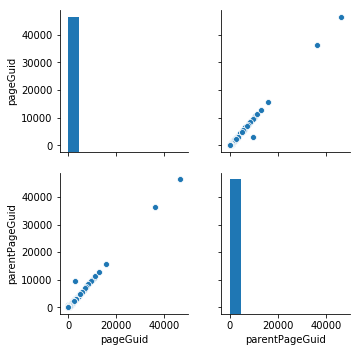

In [62]:
sns.pairplot(pageGuid_dist_df)

In [76]:
df.groupby('hhostnameHash').nunique()

hhostnameHash  pageGuid  parentPageGuid  \
hhostnameHash                                                               
000704a3e488015d32cc64a86dc32310              1         0               1   
000758a353fa674f968ab5d837170129              1         2              15   
0007f9134e2994a9622699faa03fb446              1         2               4   
000e7c78f3f74a9a932d54887cc6bb4f              1         2               2   
00152d5fbe4125b51f6f9f46b862ecd3              1         1               3   
0018c5469e810975769bd2470233868f              1         1               2   
001d74bb3f28aaed078c549b35420d03              1         6               6   
001dcc1adf7693e8639d1d8132b77a90              1         2               2   
0021e2d1a666100a9ca1d9d99b98a068              1         2              80   
00225f406d0bae4249986e68525ff957              1         8               8   
002953c0a6c6ad060d7204e365fad0ad              1        16              32   
0035a43324ed324fdce1425d431bdee8              1         1               7   
00381d77b0fb6f083c2a574ef8b29f71              1         1               3   
003eb7d4255dad4f0c5d7f3f01f2b2ab              1         2             180   
003f48654756510d219cd01d2f44358f              1         1               1   
0044a3562ec2dee60585b79b66e48304              1         1               1   
0044b64e9500d5eece8916d50c50ab9d              1         2               7   
0045274b5e1986c50ea9d3d5d6d06f06              1         1              34   
0049c7f5ab31449e494af547955e78e0              1         2              46   
0050f069f29143833f852c597c4ad877              1        10              10   
0052f84b3d3109e31f7ed2cfabb0ad00              1        68             223   
005371b8ff8cb3af3208c4e8213d2287              1         1              54   
005b54dc95d39e9285ede8d1a820a510              1         0               2   
005b7855bc7c955737a3626a42e1557d              1         1              69   
005c40dcb7b1d1fb5a8bd3ddc081f394              1         1               3   
005e4d66d9a71e9a1c16c81d5e0424c4              1         1              21   
00614f6cbfd1fd1d140720e92d8d69a4              1         2               4   
0063a2bcf013fb32a5fb1df15d613afa              1         5               5   
00653d9e0210531ccbb7928462b0e24a              1         1               1   
0068c983178f7a75ff75c2607f7fc3d0              1         1             121   
...                                         ...       ...             ...   
ff9a88d2c7c23622584af559ccc7e0d9              1         1               1   
ff9d2fb227b86b7381f5d72e226c2023              1         1               3   
ffa15e6fc0b36d504927253027f0d5d9              1         1               1   
ffa1e33a9abb970fb96941de8901b0ed              1        23              33   
ffa628d75a8672cf7ff2438a8d5117a7              1        18              19   
ffaaee5177ec94117ce32a01fe680da6              1         1               3   
ffabe6ac6ac9c256e599676060eefb99              1        23              24   
ffad3eb423343c63ee0260ebb9718952              1         0               1   
ffaee4ed45f0f50f09835e065e05e008              1        18             623   
ffaf4ba3a214b6bd11087c9c4288cfbe              1         1               4   
ffb49af79fbc603eb6f84a50d0bd6269              1         1               1   
ffb93ec7e76e4ead1175d8bb419fd511              1         9             394   
ffb9fab5d5e1b3628311017132829600              1         1              13   
ffbfb70578ca50406907d1fa92d5d6b7              1         1              60   
ffc26368da32c05d5b7a1714679b5ee5              1         1               1   
ffc28cf82a039090167c4fdde98abcae              1        17              25   
ffcac1c45a8d15cd1fa8429862377df1              1         1               1   
ffcb5418b9fbb3e6b4d1e6447445dd26              1         7              28   
ffcbb0035bf4cf919ab9983bae5f865a              1         1               4   
ffd3db74c43b08fc2944cc7c5a6d30

In [79]:
df[df['hhostnameHash']=='003eb7d4255dad4f0c5d7f3f01f2b2ab'].groupby('pageGuid').agg('count')

hhostnameHash  parentPageGuid  \
pageGuid                                                              
45c7fe34-bb17-464e-844c-b5c5425fb43a            178             178   
665f8c77-9c52-4ddd-8c1c-df801a448114              1               1   

                                      httpResponseCode  responseBodyMD5  \
pageGuid                                                                  
45c7fe34-bb17-464e-844c-b5c5425fb43a               178              178   
665f8c77-9c52-4ddd-8c1c-df801a448114                 1                1   

                                      responseBodySize  contentType  
pageGuid                                                             
45c7fe34-bb17-464e-844c-b5c5425fb43a               178          178  
665f8c77-9c52-4ddd-8c1c-df801a448114                 1            1

In [88]:
df[df['hhostnameHash'].isnull()]['httpResponseCode'].value_counts()

200    13652
461       17
Name: httpResponseCode, dtype: int64

In [87]:
df['httpResponseCode'].value_counts()

200    857110
302     55733
404     31185
204     16120
470     13824
301      6429
403      4348
400      2758
503      2585
474      1678
429      1563
307      1331
472      1324
0        1273
500       933
303       478
502       332
473       213
410       141
401       122
201        93
471        62
460        53
407        50
202        42
504        40
308        30
405        18
461        17
431        16
414        11
406        10
426        10
505         9
409         8
206         4
520         4
999         4
416         4
462         4
203         4
456         3
445         2
523         2
479         2
508         2
451         2
440         2
422         2
413         2
408         2
719         1
448         1
418         1
415         1
412         1
Name: httpResponseCode, dtype: int64

In [27]:
df.contentType.value_counts()

image/png                                   205131
text/html                                   146313
image/gif                                   118658
image/jpeg                                   75162
text/javascript                              66913
application/javascript                       65428
font/woff2                                   41576
image/svg+xml                                40362
text/css                                     38647
application/x-javascript                     31107
text/plain                                   26716
application/vnd.ms-fontobject                21167
application/octet-stream                     12113
application/font-woff                        10017
font/woff                                     7099
application/json                              7031
image/x-icon                                  5984
application/x-font-ttf                        4890
application/x-font-woff                       4258
font/ttf                       

TypeError: len() takes exactly one argument (0 given)